In [32]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community import girvan_newman

### [30 marks] Generating the graphs and visualizing them with Network-x or GEPHI.

In [33]:
def generate_graph(n, k):
    G = nx.Graph()
    G.add_nodes_from(range(1, n+1))

    for i in range(1, n+1):
        for j in range(i+1, n+1):
            if i % k != j % k:
                G.add_edge(i, j)
    return G

In [34]:
def visualize_graph(G, communities=None):
    plt.figure(figsize=(12, 8))

    pos = nx.spring_layout(G, seed=42)

    if communities:
        unique_communities = set(communities.values())
        color_map = plt.cm.rainbow(np.linspace(0, 1, len(unique_communities)))

        color_dict = {com: color_map[i] for i, com in enumerate(unique_communities)}
        node_colors = [color_dict[communities[node]] for node in G.nodes()]

        nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=300, font_size=8, alpha=0.7)
    else:
        nx.draw(G, pos, with_labels=True, node_size=300, font_size=8, alpha=0.7)

    plt.title('Graph Visualization')
    plt.tight_layout()
    plt.show()


Graph size (n, k) = (40, 7)


<ipython-input-34-cc2cc75511a1>:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


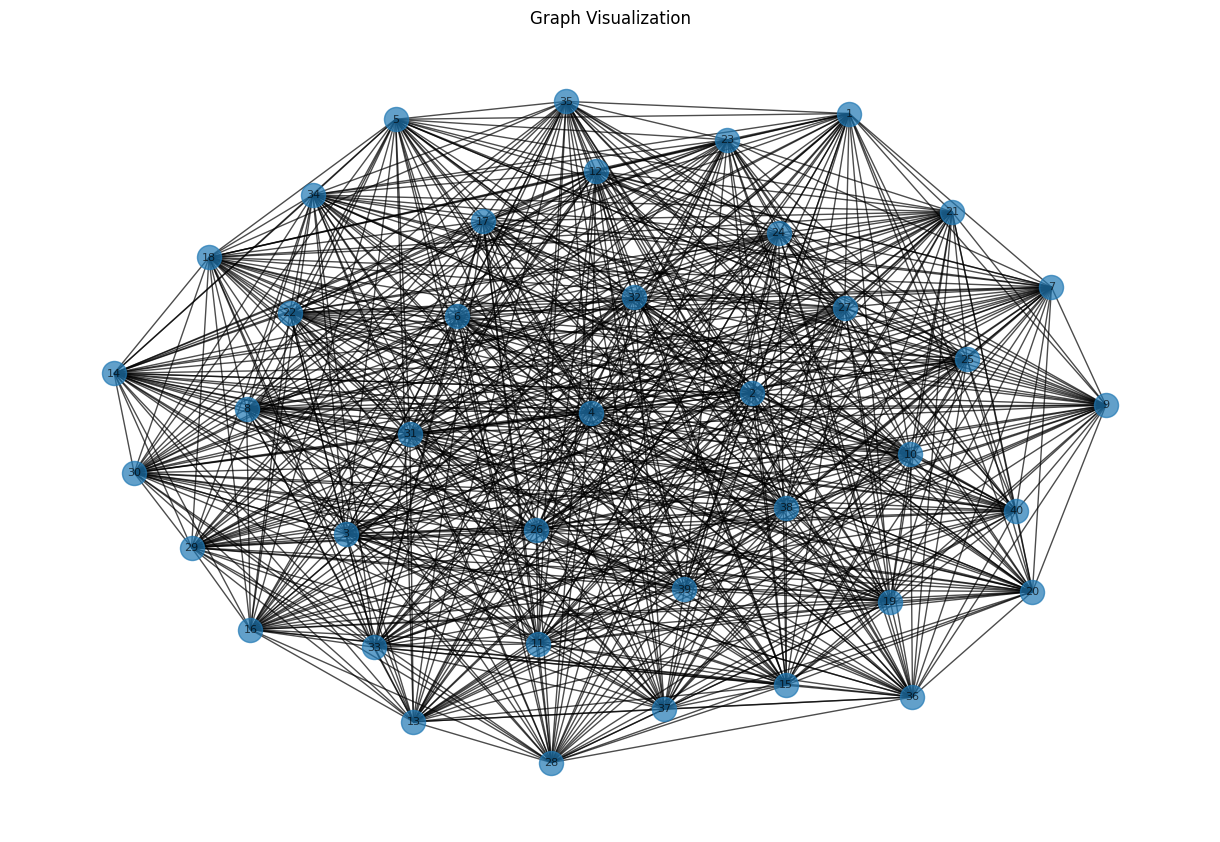


Graph size (n, k) = (20, 5)


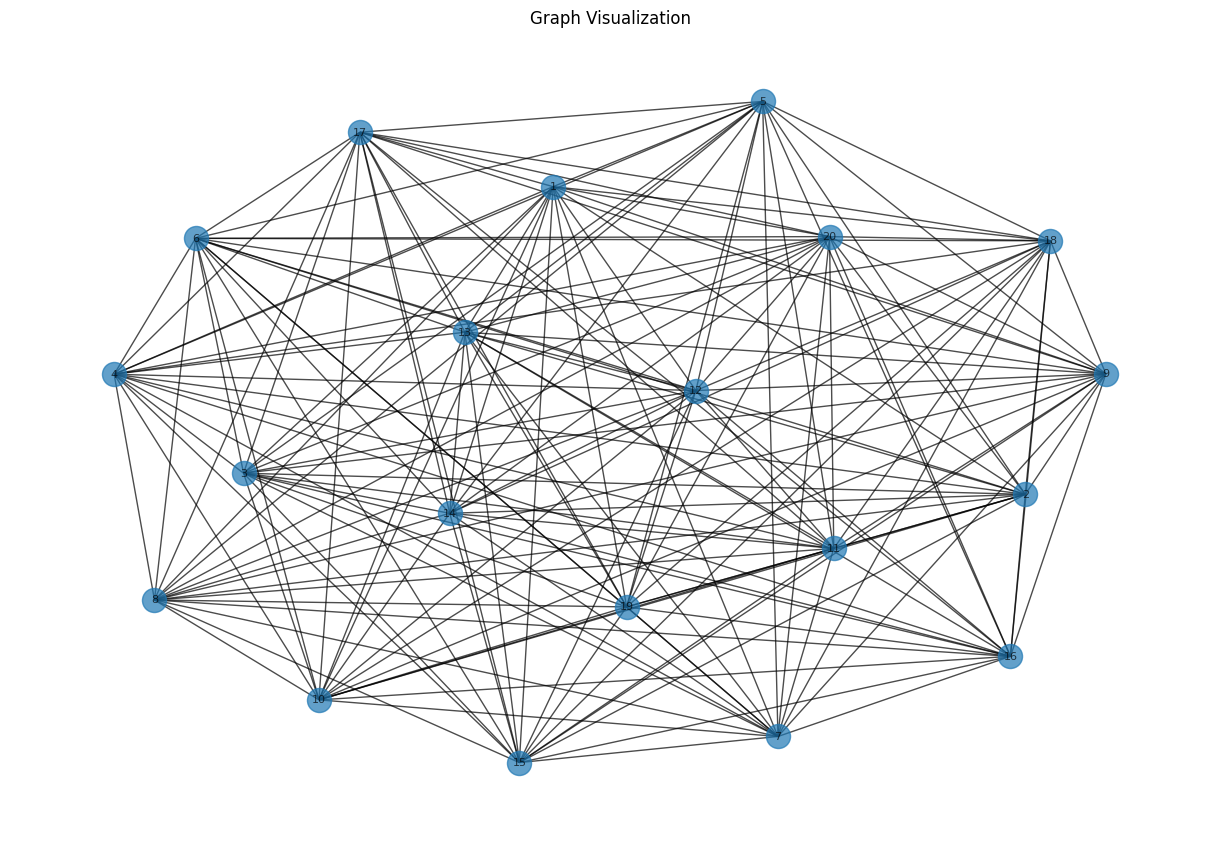


Graph size (n, k) = (10, 3)


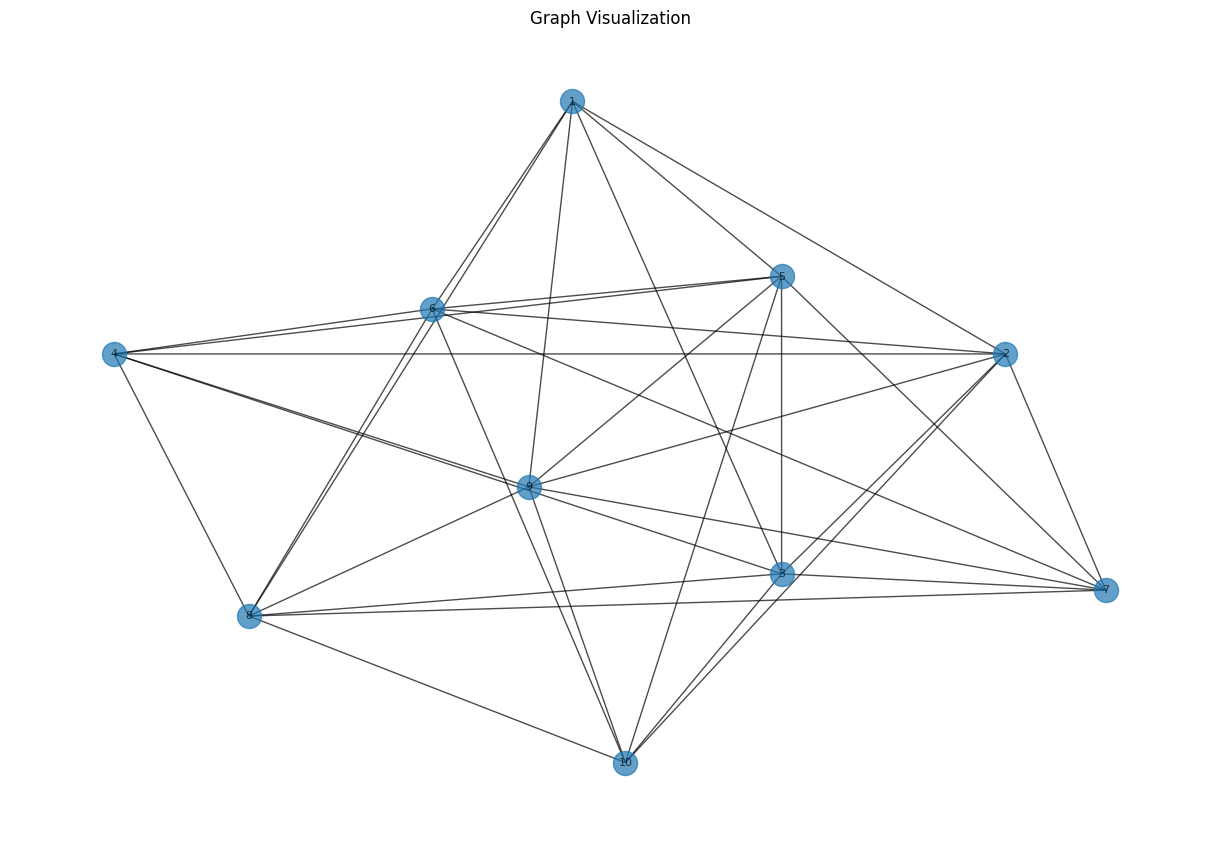

In [35]:
graph_sizes = [(40, 7), (20, 5), (10, 3)]
graph_list = []
for n, k in graph_sizes:
      print(f"\n{'='*50}")
      print(f"Graph size (n, k) = ({n}, {k})")
      print(f"{'='*50}")

      G = generate_graph(n, k)
      graph_list.append(G)
      visualize_graph(G)

### [30 marks] Count the number of cliques of each size in each graph ... Plot their histograms


Clique Analysis:
Total number of cliques: 194400
Clique Counts: {7: 194400}


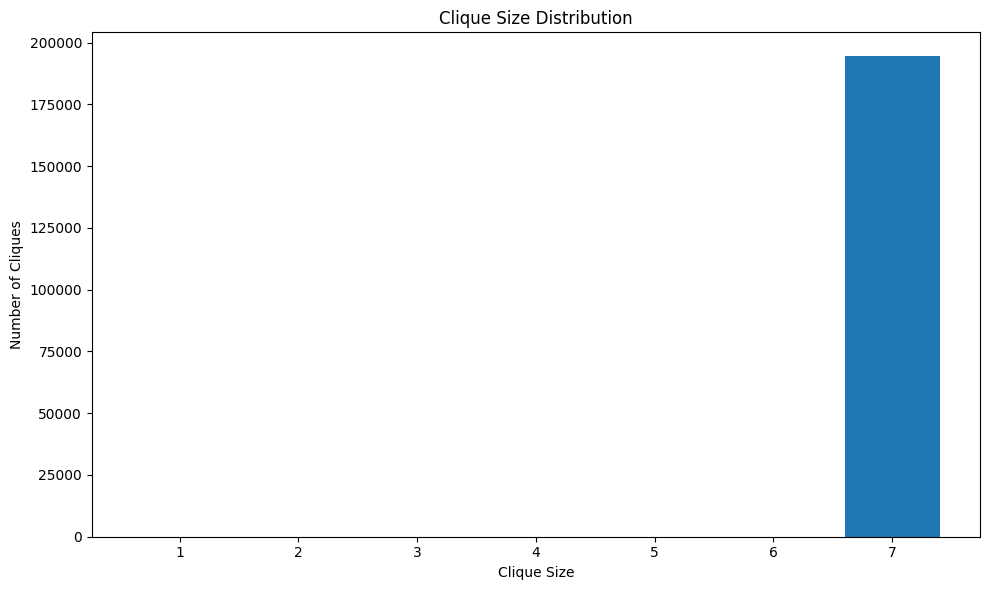


Clique Analysis:
Total number of cliques: 1024
Clique Counts: {5: 1024}


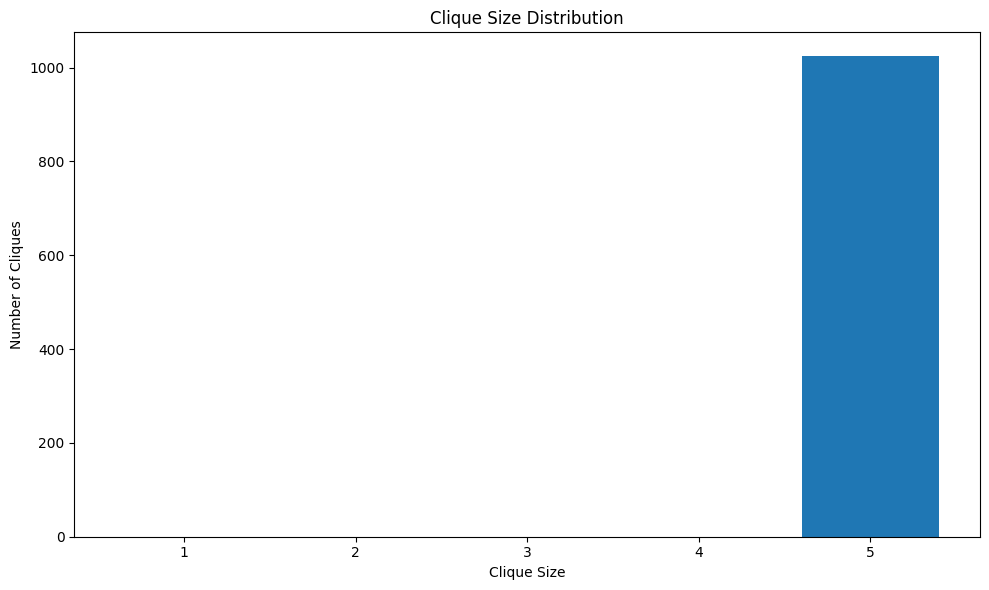


Clique Analysis:
Total number of cliques: 36
Clique Counts: {3: 36}


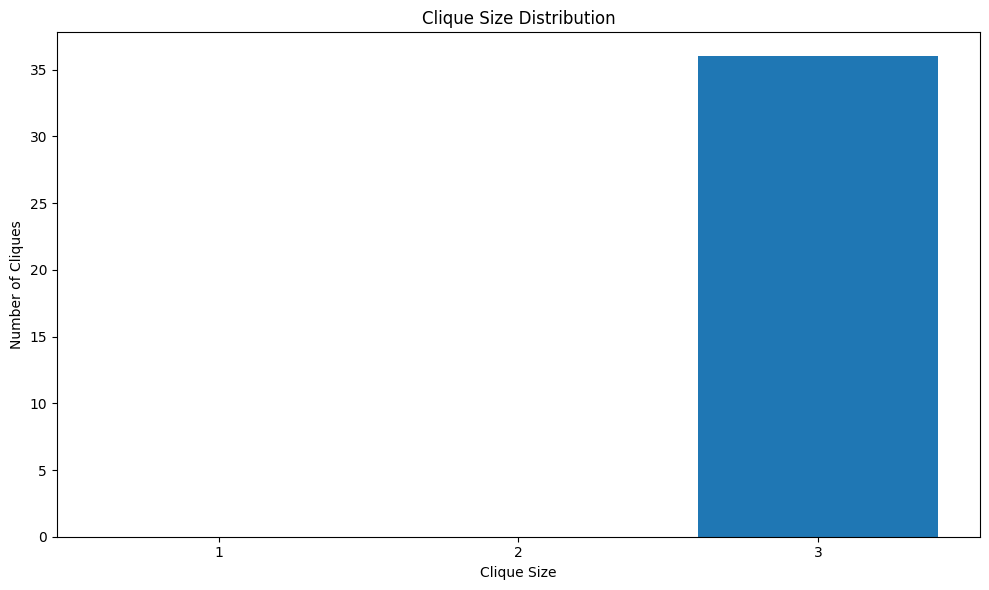

In [36]:
for i, tup in enumerate(graph_sizes):
    n, k = tup
    G = graph_list[i]
    cliques = list(nx.find_cliques(G))

    clique_counts = {}
    for clique in cliques:
        size = len(clique)
        clique_counts[size] = clique_counts.get(size, 0) + 1

    print("\nClique Analysis:")
    print("Total number of cliques:", len(cliques))
    print("Clique Counts:", clique_counts)

    plt.figure(figsize=(10, 6))

    if clique_counts:
        max_size = max(clique_counts.keys())
        sizes = list(range(1, max_size + 1))
        counts = [clique_counts.get(size, 0) for size in sizes]
    else:
        sizes = []
        counts = []

    plt.bar(sizes, counts)
    plt.title('Clique Size Distribution')
    plt.xlabel('Clique Size')
    plt.ylabel('Number of Cliques')
    plt.xticks(sizes)
    plt.tight_layout()
    plt.show()

### [30 marks] Identify the main communities in the graphs generated


Community Analysis:
Number of Communities: 2
Community Sizes: {0: 39, 1: 1}


<ipython-input-34-cc2cc75511a1>:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


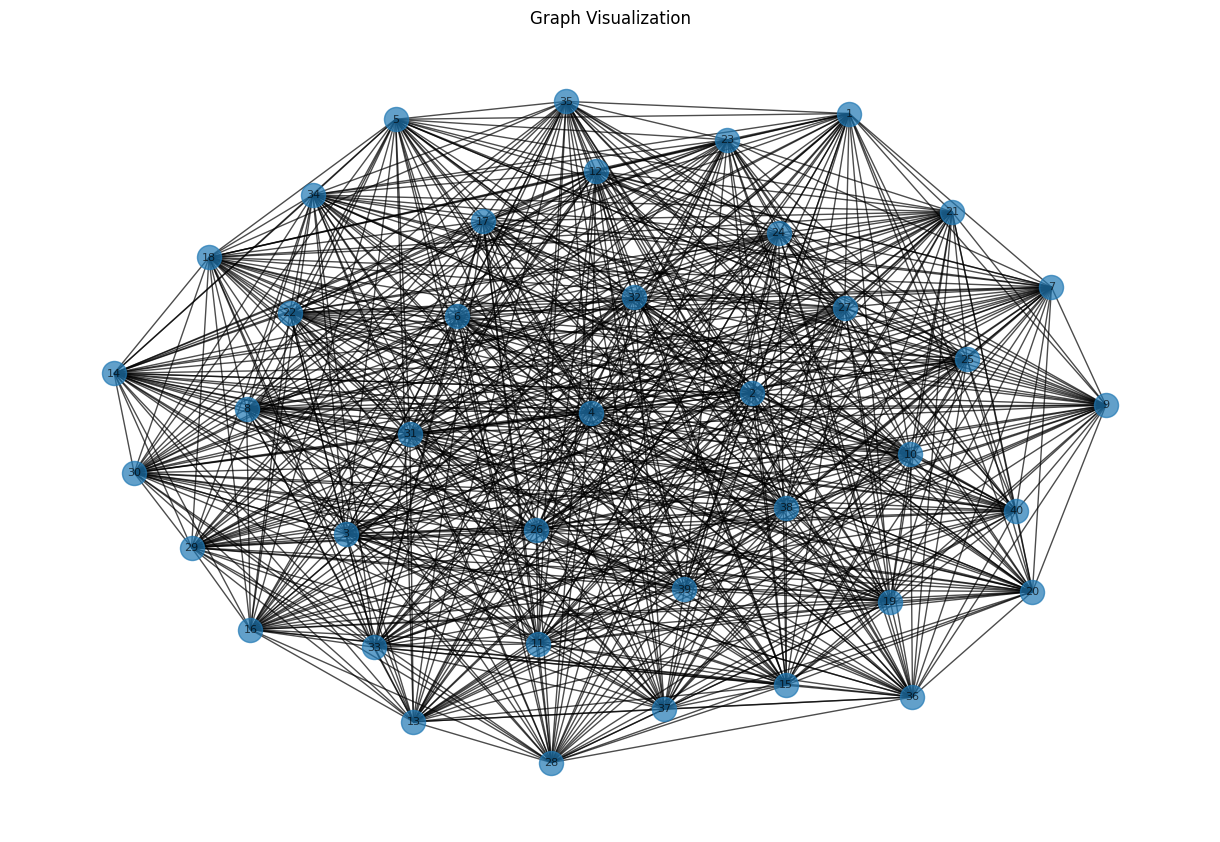


Community Analysis:
Number of Communities: 2
Community Sizes: {1: 19, 0: 1}


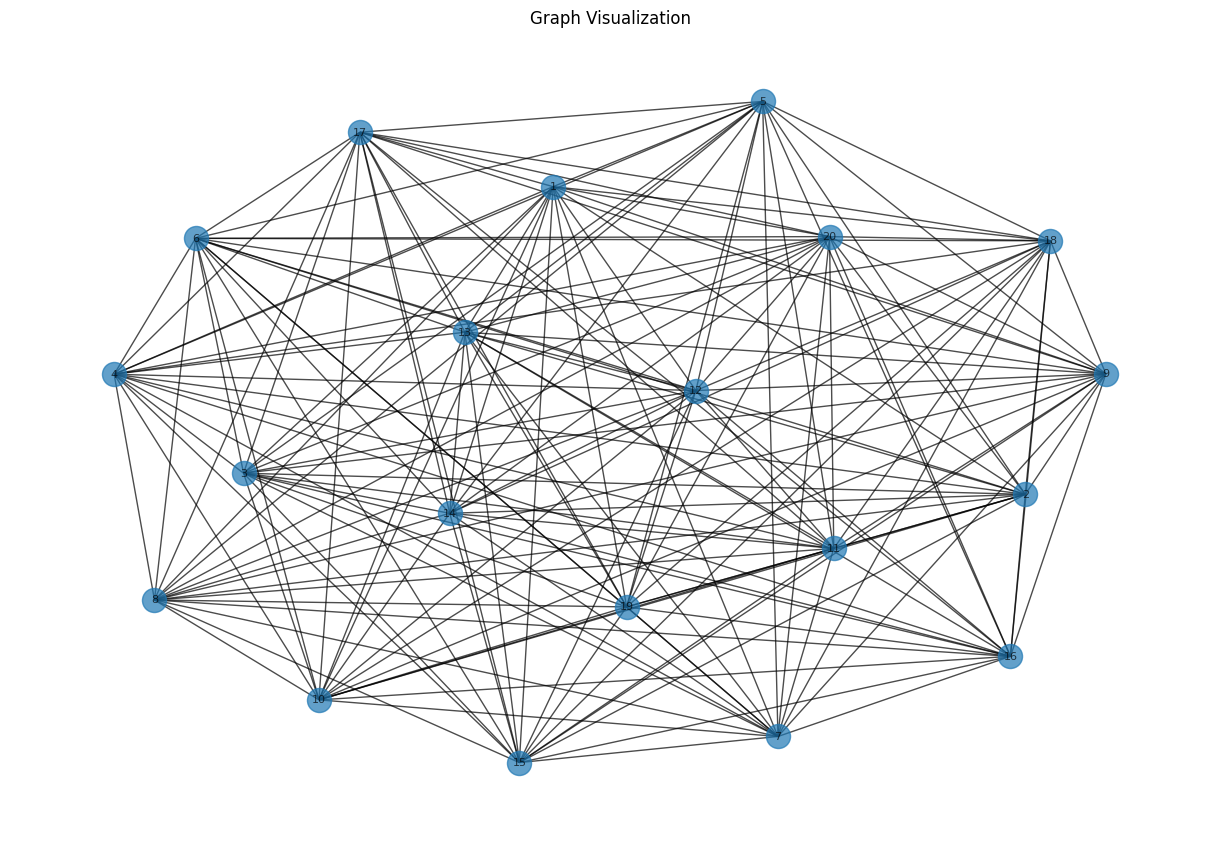


Community Analysis:
Number of Communities: 2
Community Sizes: {0: 9, 1: 1}


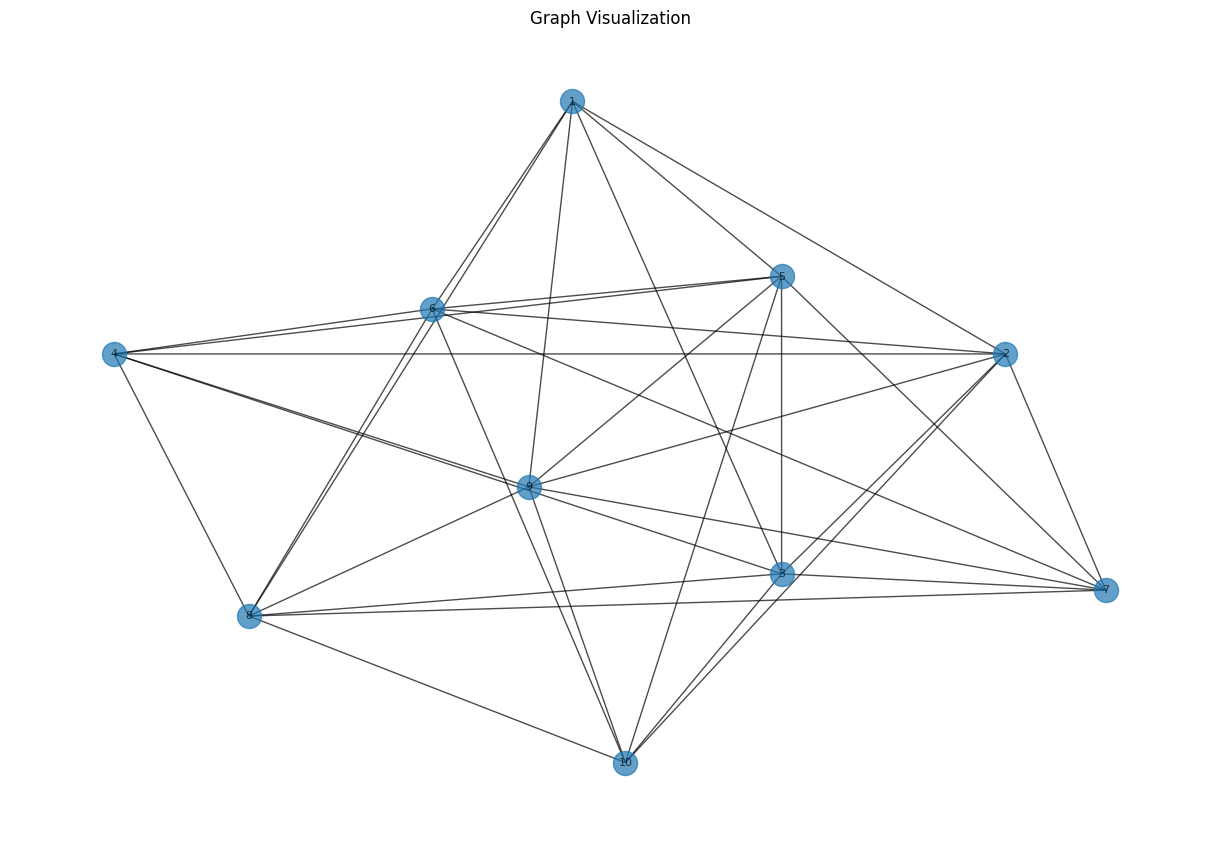

In [37]:
for i, tup in enumerate(graph_sizes):
    n, k = tup
    G = graph_list[i]
    comp = girvan_newman(G)
    first_partition = next(comp)
    communities = [list(c) for c in first_partition]

    partition = {}
    for community_id, nodes in enumerate(communities):
        for node in nodes:
            partition[node] = community_id


    community_counts = {}
    for community_id in set(partition.values()):
        community_size = sum(1 for v in partition if partition[v] == community_id)
        community_counts[community_id] = community_size

    print("\nCommunity Analysis:")
    print("Number of Communities:", len(set(partition.values())))
    print("Community Sizes:", dict(sorted(community_counts.items(), key=lambda x: x[1], reverse=True)))
    visualize_graph(G)

### [30 marks] Based on Example 10.10,
You are given a graph say (n,k) where n represents no. of nodes numbered 1 to n & k represents an arbitrary number using which we will generate our graph.
Now as per the example 10.10
In such a graph, a link exists between nodes if 2 nodes numbered i & j when divided by k doesn't leave the same remainder.
Generate such a graph, calculate the number of edges present in it & compare it with the approximation offered by the fraction (k-1)/k for the following values of n & k

In [38]:
def generate_graph(n, k):
    graph = {i: [] for i in range(1, n+1)}
    edge_count = 0

    for i in range(1, n+1):
        for j in range(i+1, n+1):
            if (i % k) != (j % k):
                graph[i].append(j)
                graph[j].append(i)
                edge_count += 1

    return graph, edge_count

In [39]:
def analyze_graph(n, k):
    graph, actual_edges = generate_graph(n, k)

    theoretical_edges = n * (n-1) * (k-1) / (2 * k)

    approximation_accuracy = abs(actual_edges - theoretical_edges) / actual_edges * 100

    return {
        'n': n,
        'k': k,
        'actual_edges': actual_edges,
        'theoretical_edges': theoretical_edges,
        'approximation_accuracy': approximation_accuracy
    }

In [40]:
results = [analyze_graph(n, k) for n, k in graph_sizes]
for result in results:
    print(f"\nGraph Analysis for n={result['n']}, k={result['k']}:")
    print(f"The actual number of edges: {result['actual_edges']}")
    print(f"Value of theoretical approximation: {result['theoretical_edges']:.2f}")
    print(f"Value of approximation accuracy: {result['approximation_accuracy']:.2f}%")


Graph Analysis for n=40, k=7:
The actual number of edges: 685
Value of theoretical approximation: 668.57
Value of approximation accuracy: 2.40%

Graph Analysis for n=20, k=5:
The actual number of edges: 160
Value of theoretical approximation: 152.00
Value of approximation accuracy: 5.00%

Graph Analysis for n=10, k=3:
The actual number of edges: 33
Value of theoretical approximation: 30.00
Value of approximation accuracy: 9.09%
